In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind

### Задание 1

1. Импортируйте файл «Данные для ДЗ 5 Корреляции.csv».
2. Постройте гистограммы распределения для рядов PHYSICS и BLOOD и сделайте визуальный вывод о нормальности распределения данных.
3. Постройте scatterplot этих двух величин и сделайте визуальный вывод о корреляции между ними.
4. Создайте функцию **proxi_ranges**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию равно 5%).
Данная функция выполняет следующие действия:
    - Вычисляет дисперсии рядов и их ковариацию с помощью функции cov из numpy и принтит эти результаты в user-friendly манере.
    - Вычисляет корреляцию Пирсона и корреляцию Спирмена и p_value этих корреляций.
    - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше альфы. Корреляция равна 0 при условии, что p-value > 0,05, т.к. если мы получили большой p-value, значит вероятность того, что мы получили корреляцию случайно большая, поэтому мы считаем, что корреляции нет. В противном случае принтит, является ли корреляция слабой (коэффциент по модулю меньше 0.3), средней (коэффциент по модулю от 0.3 до 0.7) или сильной (коэффциент по модулю больше 0.7) (для обеих корреляций).
    - Функция не обладает return.
5. Примените эту функцию к рядам PHYSICS и BLOOD из csv-файла.

In [2]:
df1 = pd.read_csv('HW5_correl.csv', sep=';')

In [3]:
df1

,PHYSICS,BLOOD
0,48,132
1,138,52
2,156,77
3,167,64
4,105,89
...,...,...
1430,174,52
1431,6,135
1432,131,58
1433,133,72


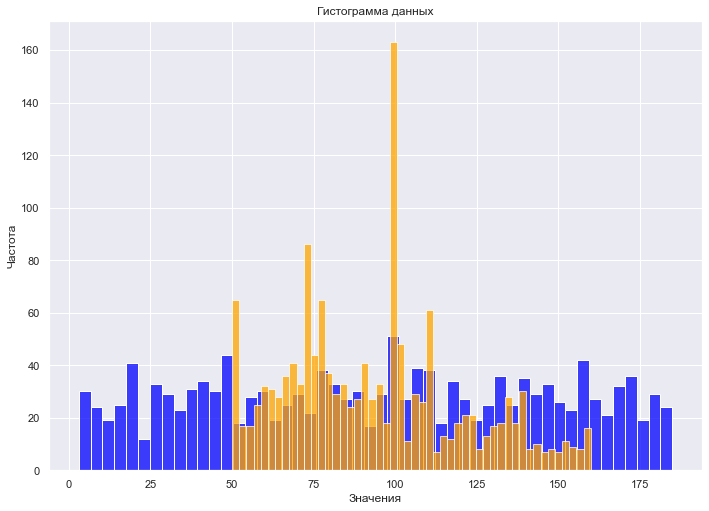

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.histplot(df1['PHYSICS'], color='blue', bins=50)
ax2 = sns.histplot(df1['BLOOD'], color='orange', bins=50)
ax1.set(xlabel='Значения', ylabel='Частота')
plt.title('Гистограмма данных')
plt.show()

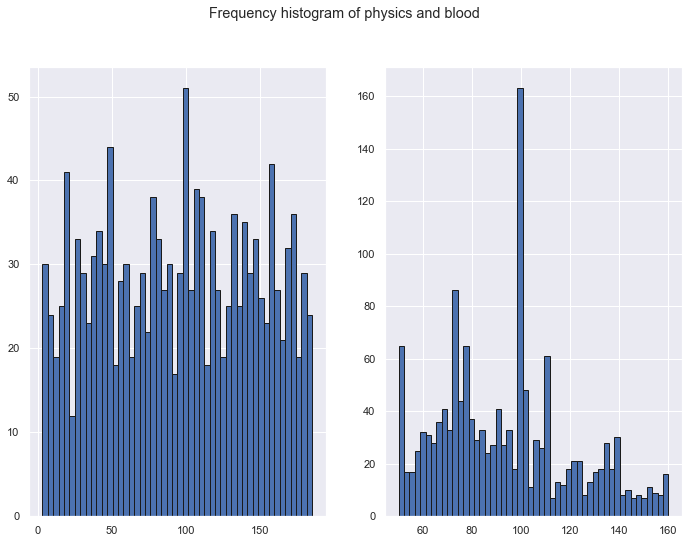

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of physics and blood')
ax1.hist(df1['PHYSICS'], bins=50, histtype='bar', ec='k') 
ax2.hist(df1['BLOOD'], bins=50, histtype='bar', ec='k') 
plt.show()

Визуально распределение 'BLOOD' похоже на хи2, а 'PHYSICS' на равномерное и там и там есть выбросы

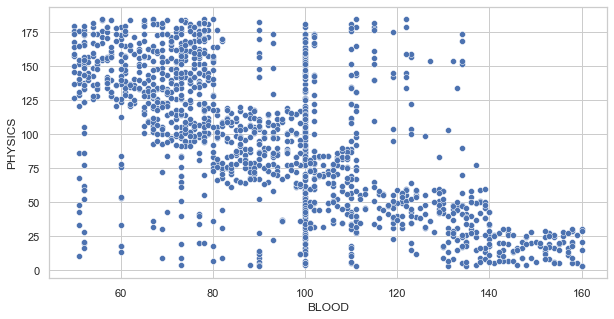

In [6]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.scatterplot(data = df1, x = df1['BLOOD'], y = df1['PHYSICS'])
plt.show()

In [11]:
def proxi_ranges(x1, x2, alpha = 0.05):
    c = np.cov(x1, x2, rowvar = False)
    print('Дисперсия ряда 1 равна ', c[0,0])
    print('Дисперсия ряда 2 равна ', c[1,1])
    print('Ковариация рядов равна ', c[0,1])
    r, p_pearson = stats.pearsonr(x1, x2)
    cor, p_spearman = stats.spearmanr(x1, x2)
    if p_pearson > alpha:
        print('Корреляция по Пирсону равна нулю')
    elif abs(r) < 0.3:
        print('Корреляция по Пирсону слабая')
    elif abs(r) <= 0.7:
        print('Корреляция по Пирсону средняя')
    else:
        print('Корреляция по Пирсону сильная')
    if p_spearman > alpha:
        print('Корреляция по Спирману равна нулю')
    elif abs(cor) < 0.3:
        print('Корреляция по Спирману слабая')
    elif abs(cor) <= 0.7:
        print('Корреляция по Спирману средняя')
    else:
        print('Корреляция по Спирману сильная')

In [12]:
proxi_ranges(df1['PHYSICS'],df1['BLOOD'])

Дисперсия ряда 1 равна  2669.462284295288
Дисперсия ряда 2 равна  726.6351425558485
Ковариация рядов равна  -921.4669232526157
Корреляция по Пирсону средняя
Корреляция по Спирману средняя


### Задание 2

1. Импортируйте файл «Данные для ДЗ 5 Манн-Уитни.csv».
2. Постройте гистограмму рядов BLOOD1 и BLOOD2.
3. Создайте функцию **mann_whitney_func**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию равно 5%).
Данная функция выполняет следующие действия:
    - Возвращает (в return) — значение статистики Манна — Уитни и p_value нулевой гипотезы.
    - Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
4. Примените эту функцию к рядам BLOOD1 и BLOOD2 из csv-файла.
5. Примените к этим рядам также t-test для сравнения средних.

In [ ]:
df2 = pd.read_csv('Данные для дз5 Манн-Уитни.csv', sep=';')

In [ ]:
df2

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.histplot(df2['BLOOD1'], color='red', bins=50)
ax2 = sns.histplot(df2['BLOOD2'], color='green', bins=50)
plt.title('Гистограмма данных', size = 14, c='b')
plt.show()

In [ ]:
def mann_whitney_func(x1, x2, alpha=0.05):
    s, p_mw = stats.mannwhitneyu(x1, x2)
    if p_mw < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    return s, p_mw

In [ ]:
mann_whitney_func(df2['BLOOD1'].dropna(), df2['BLOOD2'].dropna())

In [ ]:
def t_test(df1,df2,alpha=0.05):
    s,p = ttest_ind(df1,df2)
    print('t-критерий = ',s)
    print('p-value = ',p)
    if p>alpha:
        print('Нулевая гипотеза о равенстве средних принимается')
    else:
        print('Нулевая гипотеза о равенстве средних не принимается')

In [ ]:
t_test(df2['BLOOD1'].dropna(), df2['BLOOD2'].dropna())